# <font color='blue'> Exploratory Data Analysis with Python: Part 1 of 2</font>

### Lise Doucette, Data and Statistics Librarian
### Nich Worby, Government Information and Statistics Librarian
### mdl@library.utoronto.ca

# <font color='blue'> Outline </font>



## <font color='blue'> 1 Overview</font>
## <font color='blue'> 2 Importing libraries and reading  data </font>
## <font color='blue'> 3 Getting help </font>
## <font color='blue'> 4 Viewing your Data </font>
## <font color='blue'> 5 Plotting/Graphing your Data</font>
## <font color='blue'> 6 Selecting and filtering your data </font>


---
In Part II, we'll do a quick review of Part I, and cover crosstabs, grouping data, editing variables, and creating new variables 

---

## <font color='blue'> 1 Overview</blue>

- What is Python and why use it?
- Versions of Python
  - many older projects are written in 2.7, but most people new to Python learn version 3
  - can use the following code to determine what version your system is using:

~~~
    from platform import python_version
    print(python_version())
~~~

   
- How Python works - programming language, objects and methods, libraries, indentation/white space
- Indexing (starts at 0), rows (records) and columns (variables/attributes)
- Some options for using Python - [Anaconda Navigator](https://www.anaconda.com/distribution/) is desktop software through which you can install different ways of using Python: Jupyter Lab, Jupyter Notebooks, spyder, a console (let's take a look); [Google Colab](https://colab.research.google.com) is a cloud-based Jupyter notebooks environment run through an individual's Google account.
- Jupyter notebooks - cells of code and markdown; last line determines output of cell; running cells (changes from * to a number)

## <font color='blue'> 2 Importing libraries and reading data</font>


### a) Importing packages/libraries

Things to consider:
- functionality that you need 
- you may need to install the libraries first using [Anaconda Navigator](https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/), [conda](https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/), or the [command line](https://packaging.python.org/tutorials/installing-packages/)
- use a nickname/short name for libraries that you will be referring to later (there are some common/standard ones)
- syntax for importing packages/libraries:
~~~
import packagename as nickname
~~~
- for plotting in Jupyter notebooks, need to add one more line to tell it to display the plots directly in the notebook
~~~
%matplotlib inline
~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### b) Reading data

Things to consider:
- where the data is stored
    - same folder as your Jupyter notebook or Python file?  don't need to specify the path
    - different folder?  need to specify path
- file type of data (csv, excel, text, other) and whether you might need a package to help you read the data
- how the data is separated (comma, space, semicolon, other)
- is there a header row with variable names?
- pandas makes some guesses about your data format and type
    - int64, float64, object, bool
- in pandas, your data is stored in a data frame
- what does the code book (if it exists) say about the data?  [Titanic Codebook](https://github.com/nichworby/python/blob/master/TitanicMetadata.pdf)

[Importing Data cheatsheat](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Cheat+Sheets/Importing_Data_Python_Cheat_Sheet.pdf)

In [18]:
titanic = pd.read_csv('titanic.csv', sep=';')

## <font color='blue'>3 Getting help</font>

- inline/in-program documentation
    
        help()
    
- official documentation - e.g., [Pandas](https://pandas.pydata.org/)
- 'unofficial' documentation aka Googling and finding examples: python sort data   
- cheat-sheets, e.g., [Wrangling Data with Pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- online guides/tutorials, e.g., [Variables, Strings, and Numbers](http://introtopython.org/var_string_num.html)
- online courses (no fee), e.g, Python courses through [Linked In Learning](https://lnkd.in/gf85Mmv)
- online courses (fee), e.g., [Python for Data Science and AI](https://www.coursera.org/learn/python-for-applied-data-science-ai)

In [4]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=No

## <font color='blue'>4 Viewing your Data</font>


### a)  View the first few rows of data

Things to note:
- first row is Row 0
- you can indicate how many rows you want to see by including a number in parentheses (default is 5)

In [42]:
titanic.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,True,NaN,"Allen, Miss. Elisabeth Walton",True,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,True,1.0,"Allison, Master. Hudson Trevor",True,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,True,0.0,"Allison, Miss. Helen Loraine",True,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,True,0.0,"Allison, Mr. Hudson Joshua Creighton",True,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,True,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",True,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,True,1.0,"Anderson, Mr. Harry",True,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,True,1.0,"Andrews, Miss. Kornelia Theodosia",True,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,True,0.0,"Andrews, Mr. Thomas Jr",True,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,True,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",True,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,True,0.0,"Artagaveytia, Mr. Ramon",True,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


### b) View a summary of your variables

Things to consider:
- what kinds of summary measures are meaningful for different variable types?
- how is the mean value of age calculated?
- documentation for formatting of a command: [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [6]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
help(titanic.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None) method of pandas.core.frame.DataFrame instance
    Generates descriptive statistics that summarize the central tendency,
    dispersion and shape of a dataset's distribution, excluding
    ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignored
        for ``Series``. Here are the options:
    
   

In [35]:
titanic.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1308.000000,1308.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.295872,0.381498,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837390,0.485940,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


### c) Missing/null data

Things to consider:
- why is the data "missing"? > e.g., not available, not known, participant refused to provide it
- how will missing data affect your analyses? What can you do to address this?
    - need to know when pandas includes/excludes null values

In [36]:
titanic.isnull().sum()

pclass          1
survived        1
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

### d) Variable/column names and types

Things to consider:
- did pandas guess correctly about the type of data? What can you do if it didn't?  Indicate the type using __.astype__

~~~
titanic['ColumnName'] = titanic['ColumnName'].astype('NewDataType')
~~~
- common data types
  - int64 - integers (whole numbers)
  - float64 - decimal point numbers
  - object - text/string
  - bool - True/False value only
  - category - a text/string variable consisting of only a few different values

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1308 non-null float64
survived     1308 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 143.2+ KB


For each variable, you'll want to investigate a bit further to see what the data looks like and whether the data type was correctly 'guessed' by pandas when it imported the data (use the Codebook to help!).

For this workshop, we have verified that 9 of 14 data types were assigned correctly, and 5 were not.  We need to change the data type of the following variables:

- pclass
- survived
- sex
- embarked
- body

We'll look at two variables together that were not correctly assigned.

View all the data for the variable *body*:

In [13]:
titanic['body']

0         NaN
1         NaN
2         NaN
3       135.0
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9        22.0
10      124.0
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25      148.0
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1279      NaN
1280      NaN
1281      NaN
1282      NaN
1283      NaN
1284      NaN
1285    298.0
1286      NaN
1287      NaN
1288    314.0
1289      NaN
1290      NaN
1291      NaN
1292      NaN
1293      NaN
1294     14.0
1295      NaN
1296    131.0
1297      NaN
1298      NaN
1299      NaN
1300      NaN
1301    312.0
1302      NaN
1303      NaN
1304    328.0
1305      NaN
1306    304.0
1307      NaN
1308      NaN
Name: body, Length: 1309, dtype: float64

View summary data for one variable:

In [14]:
titanic['body'].value_counts()

259.0    1
305.0    1
51.0     1
68.0     1
47.0     1
98.0     1
188.0    1
120.0    1
156.0    1
37.0     1
58.0     1
70.0     1
196.0    1
61.0     1
53.0     1
4.0      1
7.0      1
32.0     1
176.0    1
50.0     1
1.0      1
14.0     1
312.0    1
328.0    1
304.0    1
297.0    1
283.0    1
285.0    1
327.0    1
142.0    1
        ..
101.0    1
121.0    1
292.0    1
299.0    1
286.0    1
322.0    1
294.0    1
209.0    1
187.0    1
153.0    1
255.0    1
173.0    1
275.0    1
287.0    1
261.0    1
258.0    1
201.0    1
230.0    1
271.0    1
234.0    1
245.0    1
166.0    1
109.0    1
149.0    1
174.0    1
97.0     1
197.0    1
130.0    1
75.0     1
135.0    1
Name: body, Length: 121, dtype: int64

If we need to change the data type, we do so using the following format:

~~~
titanic['ColumnName'] = titanic['ColumnName'].astype('NewDataType')
~~~

In [ ]:
titanic['body'] = titanic['body'].astype('object')

For the variable *pclass*:

In [15]:
titanic['pclass']

0       1.0
1       NaN
2       1.0
3       1.0
4       1.0
5       1.0
6       1.0
7       1.0
8       1.0
9       1.0
10      1.0
11      1.0
12      1.0
13      1.0
14      1.0
15      1.0
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
1279    3.0
1280    3.0
1281    3.0
1282    3.0
1283    3.0
1284    3.0
1285    3.0
1286    3.0
1287    3.0
1288    3.0
1289    3.0
1290    3.0
1291    3.0
1292    3.0
1293    3.0
1294    3.0
1295    3.0
1296    3.0
1297    3.0
1298    3.0
1299    3.0
1300    3.0
1301    3.0
1302    3.0
1303    3.0
1304    3.0
1305    3.0
1306    3.0
1307    3.0
1308    3.0
Name: pclass, Length: 1309, dtype: category
Categories (3, float64): [1.0, 2.0, 3.0]

In [19]:
titanic['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [10]:
titanic['pclass']= titanic['pclass'].astype('category')

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null bool
survived     1308 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 134.3+ KB


In [23]:
titanic.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


## Exercise

Change the three remaining variables that were assigned an incorrect data type.  Check that all three have been correctly changed.

1. survived
2. sex
3. embarked

In [5]:
titanic['survived'] = titanic['survived'].astype('category')

In [9]:
titanic['sex'] = titanic['sex'].astype('category')

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1279    True
1280    True
1281    True
1282    True
1283    True
1284    True
1285    True
1286    True
1287    True
1288    True
1289    True
1290    True
1291    True
1292    True
1293    True
1294    True
1295    True
1296    True
1297    True
1298    True
1299    True
1300    True
1301    True
1302    True
1303    True
1304    True
1305    True
1306    True
1307    True
1308    True
Name: sex, Length: 1309, dtype: bool

In [ ]:
titanic['embarked'] = titanic['embarked'].astype('category')

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null bool
survived     1308 non-null float64
name         1309 non-null object
sex          1309 non-null bool
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: bool(2), float64(4), int64(2), object(6)
memory usage: 125.4+ KB


## <font color='blue'>5 Plotting/Graphing your Data</font>

Different types of plots are appropriate for different types of data.  We'll just explore a couple of types here.  For more information, check out the [Data Visualization Guide](https://mdl.library.utoronto.ca/dataviz/getting-started).

### a) Create a bar plot for categorical data

In [ ]:
titanic['survived'].value_counts().plot(kind='bar')

### b) Create a histogram for continuous, numerical data

In [ ]:
titanic['age'].plot(kind='hist')

## Exercise

1. What was the most common age of passengers on the Titanic? Hint: Use a function that gives you meaningful summary data
2. Create a bar plot of passenger class
3. Add a title to the plot created in exercise 2.  For help on how to do so, try Googling or using python help functions.

In [ ]:
titanic['age'].value_counts()

In [ ]:
titanic['pclass'].value_counts().plot(kind='bar')

In [ ]:
help(plt)
# or google something like plot title python

Text(0.5, 1.0, 'Passenger Class Aboard the Titanic')

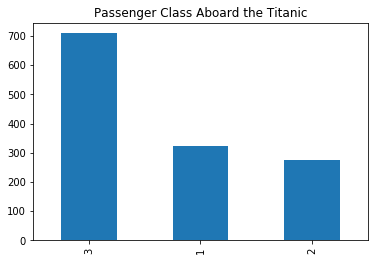

In [21]:
titanic['pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Aboard the Titanic')

## <font color='blue'>6. Selecting and filtering your data</font>

Things to note:
- syntax differences when selecting [one] vs [[multiple]] columns

We're going to access columns by calling them by their name. It's helpful to get a breakdown of all column names by using the .columns function.

In [7]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### a) Select/view one column

In order to select a single column, use the following syntax:

    dataframe['column_name']

In [8]:
titanic['name']

0                           Allen, Miss. Elisabeth Walton
1                          Allison, Master. Hudson Trevor
2                            Allison, Miss. Helen Loraine
3                    Allison, Mr. Hudson Joshua Creighton
4         Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
5                                     Anderson, Mr. Harry
6                       Andrews, Miss. Kornelia Theodosia
7                                  Andrews, Mr. Thomas Jr
8           Appleton, Mrs. Edward Dale (Charlotte Lamson)
9                                 Artagaveytia, Mr. Ramon
10                                 Astor, Col. John Jacob
11      Astor, Mrs. John Jacob (Madeleine Talmadge Force)
12                          Aubart, Mme. Leontine Pauline
13                           Barber, Miss. Ellen "Nellie"
14                   Barkworth, Mr. Algernon Henry Wilson
15                                    Baumann, Mr. John D
16                               Baxter, Mr. Quigg Edmond
17        Baxt

### b) Select/view multiple columns

The syntax for selecting multiple columns requires the use of two sets of brackets. Use the following syntax:
        
        dataframe[['col1','col2']]

In [18]:
titanic[ ['name', 'fare'] ]

,name,fare,pclass
0,"Allen, Miss. Elisabeth Walton",211.3375,1
1,"Allison, Master. Hudson Trevor",151.5500,1
2,"Allison, Miss. Helen Loraine",151.5500,1
3,"Allison, Mr. Hudson Joshua Creighton",151.5500,1
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",151.5500,1
5,"Anderson, Mr. Harry",26.5500,1
6,"Andrews, Miss. Kornelia Theodosia",77.9583,1
7,"Andrews, Mr. Thomas Jr",0.0000,1
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",51.4792,1
9,"Artagaveytia, Mr. Ramon",49.5042,1


## Exercise

1. Display the columns that contain passenger class, age, and fare data.


In [19]:
titanic[['pclass', 'age', 'fare']]

,pclass,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,1,2.0000,151.5500
3,1,30.0000,151.5500
4,1,25.0000,151.5500
5,1,48.0000,26.5500
6,1,63.0000,77.9583
7,1,39.0000,0.0000
8,1,53.0000,51.4792
9,1,71.0000,49.5042


### c) Select/view data that meets certain conditions (filters)

You can create filters based on numeric conditions:

In [14]:
titanic[titanic['fare'] > 50]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
10,1,0,"Astor, Col. John Jacob",male,47.0000,1,0,PC 17757,227.5250,C62 C64,C,NaN,124.0,"New York, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0000,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0000,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"


In [ ]:
titanic[titanic['survived'] == 1]


Filters can also be created for strings:

In [ ]:
titanic[titanic['name'].str.contains("Robert")]

In [ ]:
titanic[titanic['name'] == "Chisholm, Mr. Roderick Robert Crispin"]

### d) Number of rows that meet your conditions


In [ ]:
len(titanic[titanic['fare'] > 50])

### e) Combine multiple filters

Note: Combine with **&** (this means AND) or **|** (this means OR)

In [ ]:
titanic[(titanic['fare'] > 50) & (titanic['name'].str.contains(r'\bRobert\b'))]

In [ ]:
titanic[(titanic['pclass']==1) | (titanic['pclass']==2)]

### f) Sort Data

Numeric values can be sorted to be displayed either ascending (lowest to highest) or descending values (highest to lowest). Sorting data frames by the value of cells in a particular column uses the following syntax:

        dataframename.sort_values(by=['column'],)
        
Note: The default setting is to sort from lowest to highest. To switch to ordering highest to lowest, add the ascending=False argument.

In [ ]:
titanic.sort_values(by=['age'], )

In [ ]:
titanic.sort_values(by=['age'], ascending = False)

## Exercise

1. Create a filter that lists passengers who did not survive
2. Combine the filters we created earlier in Section 6c) to create a list of passengers with the name Robert who survived
3. Create a filter that lists passengers in class 1 who were more than 30 years old
4. How many passengers fit the criteria from question 3?
5. Create a filter to search for passengers with the following honorific titles in their names: Sir, Lady, Jonkheer.

In [ ]:
titanic[titanic['survived'] == 0]

In [ ]:
titanic[(titanic['name'].str.contains("Robert")) & (titanic['survived'] == 1)]

In [ ]:
titanic[(titanic['pclass']==1) & (titanic['age']>30)]

In [ ]:
len(titanic[(titanic['pclass']==1) & (titanic['age']>30)])

In [20]:
titanic[(titanic['name'].str.contains(r'b\Sir\b')) | (titanic['name'].str.contains("Lady")) | (titanic['name'].str.contains("Jonkheer"))]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
99,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6,A16,C,1,NaN,London / Paris
234,1,0,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,NaN,NaN,"Rotterdam, Netherlands"
